# Problem Set 3 - Solutions
### Heather Chen
### 1. Stochastic cake eating problem
#### (a)

In [2]:
import numpy as np
import scipy.optimize as opt
import scipy.interpolate as intpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Set the parameters
beta = 0.9
gamma = 2.2
W_min = 0.1
W_max = 10.0
W_size = 30
W_vec = np.linspace(W_min, W_max, W_size)
V_t = np.log(W_vec)
eps_vec = np.array([-1.4, -0.55, 0, 0.55, 1.4])
eps_prob = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
eps_size = eps_vec.shape[0]

In [4]:
def util_CRRA(W, W_pr, gamma):
    c = W - W_pr
    util = (c ** (1 - gamma) - 1) / (1 - gamma)
    return util

def neg_V_iid(W_pr, *args):
    W, eps, util, Exp_V_t_interp, gamma, beta = args
    Vtp1 = np.exp(eps)*util(W, W_pr, gamma) + beta * Exp_V_t_interp(W_pr)
    neg_Vtp1 = -Vtp1
    
    return neg_Vtp1

In [5]:
V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    Exp_V = V_init @ eps_prob.reshape((eps_size,1))
    
    Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic',
                                   fill_value='extrapolate')

    for eps_ind in range(eps_size):
   
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                              args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x

    VF_dist = ((V_init - V_new) ** 2).sum()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)

VF_iter= 1 , VF_dist= 3494.416552492849
VF_iter= 2 , VF_dist= 3288.9775602179398
VF_iter= 3 , VF_dist= 4368.033199294504
VF_iter= 4 , VF_dist= 5171.123172733101
VF_iter= 5 , VF_dist= 5690.816865389136
VF_iter= 6 , VF_dist= 5962.334129328164
VF_iter= 7 , VF_dist= 6029.41086344141
VF_iter= 8 , VF_dist= 5938.006359170563
VF_iter= 9 , VF_dist= 5728.733568262048
VF_iter= 10 , VF_dist= 5436.0895918287815
VF_iter= 11 , VF_dist= 5088.450567375282
VF_iter= 12 , VF_dist= 4708.595711208244
VF_iter= 13 , VF_dist= 4314.42587097833
VF_iter= 14 , VF_dist= 3919.652986508642
VF_iter= 15 , VF_dist= 3534.453890339967
VF_iter= 16 , VF_dist= 3166.071779909474
VF_iter= 17 , VF_dist= 2819.372405911818
VF_iter= 18 , VF_dist= 2497.3313722144326
VF_iter= 19 , VF_dist= 2201.4557625474285
VF_iter= 20 , VF_dist= 1932.139917895233
VF_iter= 21 , VF_dist= 1688.959663806459
VF_iter= 22 , VF_dist= 1470.9108719157214
VF_iter= 23 , VF_dist= 1276.5993702276612
VF_iter= 24 , VF_dist= 1104.3893159738705
VF_iter= 25 , VF_dis

#### (b)

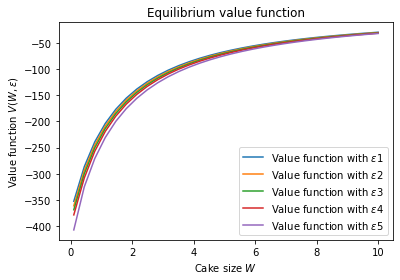

In [6]:
for i in range(5):
    plt.plot(W_vec, V_new[:,i], label='Value function with $\epsilon${}'.format(i+1))
plt.title('Equilibrium value function')
plt.xlabel('Cake size $W$')
plt.ylabel('Value function $V(W, \epsilon)$')
plt.legend()

#### (c)

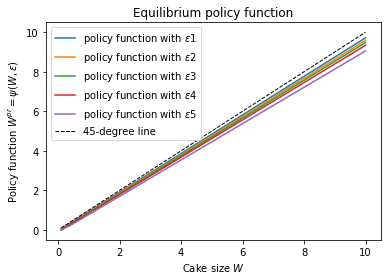

In [9]:
for i in range(5):
    plt.plot(W_vec, psi_mat[:,i], 
             label='policy function with $\epsilon${}'.format(i+1))
plt.plot(W_vec, W_vec, color = 'black', linewidth=1, linestyle='--',
         label='45-degree line')
plt.title('Equilibrium policy function')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $W^{pr}=\psi(W, \epsilon)$')
plt.legend()

### 2. Persistent stochastic cake eating problem
#### (a)

In [10]:
#Set the matrix
trans_mat = np.array([[0.4,0.28,0.18,0.1,0.04],
                     [0.2, 0.4, 0.2, 0.13, 0.17],
                     [0.1, 0.2, 0.4, 0.2, 0.2],
                     [0.07, 0.13, 0.2, 0.4, 0.2],
                     [0.04, 0.1, 0.18, 0.28, 0.4]])
trans_mat.shape

(5, 5)

In [11]:
V_init = np.zeros((W_size,eps_size))

V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size,eps_size))
    psi_mat = np.zeros((W_size,eps_size))
    
    for eps_ind in range(eps_size):           
        
        eps = eps_vec[eps_ind]
        trans_mat_ind = trans_mat[eps_ind, :]
        Exp_V = V_init @ trans_mat_ind.reshape((eps_size,1))
        Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic', fill_value='extrapolate')
        
        for W_ind in range(W_size): 
            W = W_vec[W_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results2 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                           args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results2.fun
            psi_mat[W_ind, eps_ind] = results2.x

    VF_dist = ((V_init - V_new) ** 2).sum()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)

V_2 = V_new.copy()
psi_2 = psi_mat.copy()

VF_iter= 1 , VF_dist= 3494.416552492849
VF_iter= 2 , VF_dist= 5608.663059236116
VF_iter= 3 , VF_dist= 7653.92696066616
VF_iter= 4 , VF_dist= 9620.261457778535
VF_iter= 5 , VF_dist= 11315.95957969639
VF_iter= 6 , VF_dist= 12716.70717169389
VF_iter= 7 , VF_dist= 13834.318871458
VF_iter= 8 , VF_dist= 14685.96189270081
VF_iter= 9 , VF_dist= 15293.302835128996
VF_iter= 10 , VF_dist= 15680.312511143597
VF_iter= 11 , VF_dist= 15871.76017490482
VF_iter= 12 , VF_dist= 15892.304062795663
VF_iter= 13 , VF_dist= 15765.808587291414
VF_iter= 14 , VF_dist= 15514.854112942892
VF_iter= 15 , VF_dist= 15160.421028860352
VF_iter= 16 , VF_dist= 14721.7107868476
VF_iter= 17 , VF_dist= 14216.070263679601
VF_iter= 18 , VF_dist= 13658.991232270795
VF_iter= 19 , VF_dist= 13064.161397074386
VF_iter= 20 , VF_dist= 12443.550013327938
VF_iter= 21 , VF_dist= 11807.515721162881
VF_iter= 22 , VF_dist= 11164.927118351174
VF_iter= 23 , VF_dist= 10523.289383017709
VF_iter= 24 , VF_dist= 9888.872144733026
VF_iter= 25 , VF

VF_iter= 192 , VF_dist= 2.1368374494137425e-05
VF_iter= 193 , VF_dist= 1.8854381101267757e-05
VF_iter= 194 , VF_dist= 1.663556981296641e-05
VF_iter= 195 , VF_dist= 1.467736654032352e-05
VF_iter= 196 , VF_dist= 1.2949238944337787e-05
VF_iter= 197 , VF_dist= 1.1424223781152901e-05
VF_iter= 198 , VF_dist= 1.0078509807305692e-05
VF_iter= 199 , VF_dist= 8.891069627513983e-06
VF_iter= 200 , VF_dist= 7.843334673482762e-06


#### (b)

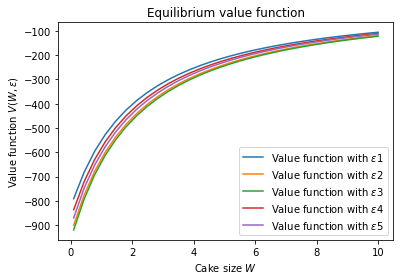

In [12]:
for i in range(5):
    plt.plot(W_vec, V_2[:,i], label='Value function with $\epsilon${}'.format(i+1))
plt.title('Equilibrium value function')
plt.xlabel('Cake size $W$')
plt.ylabel('Value function $V(W,\epsilon)$')
plt.legend()

#### (c)

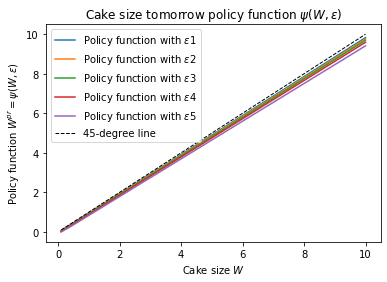

In [13]:
for i in range(5):
    plt.plot(W_vec, psi_2[:,i], label='Policy function with $\epsilon${}'.format(i+1))
plt.plot(W_vec, W_vec, color = 'black', linewidth=1, linestyle='--',label='45-degree line')
plt.title('Cake size tomorrow policy function $\psi(W,\epsilon)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $W^{pr}=\psi(W,\epsilon)$')
plt.legend()